# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.plotting import lag_plot
import matplotlib as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().sum().sum()

0

##### No missing data

How many rows and columns are in our data?

In [5]:
sensor.shape

(1751, 12)

##### There are 1751 rows and 12 columns

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
TimeSeriesIndex=pd.date_range(start='1/1/2018 00:00:00', freq='s', periods=1751)
TimeSeriesIndex

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [7]:
type(TimeSeriesIndex[0])

pandas._libs.tslibs.timestamps.Timestamp

Assign the time series index to the dataframe's index.

In [8]:
sensor.index=TimeSeriesIndex
#sensor.tail()

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [9]:
#userAcceleration.x. Set freq=60 in the seasonal_decompose

res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
resplot=res.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

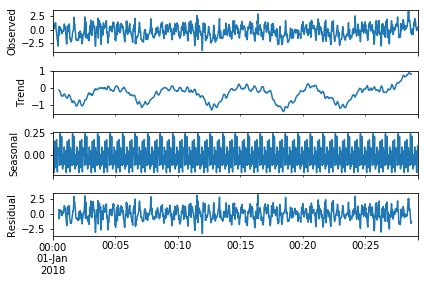

In [10]:
res=sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
resplot2=res.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

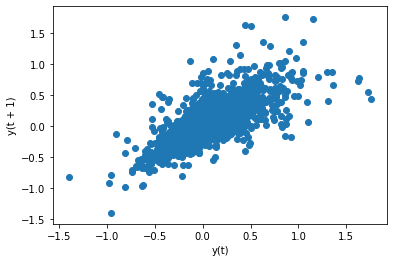

In [11]:
lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

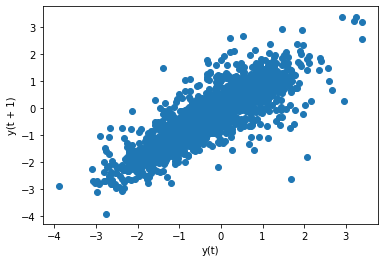

In [12]:
lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

: they are correlated. Positive correlation for both ?

Autoregressive model with lag 1

In [13]:
train, test = sensor['userAcceleration.x'][:-100], sensor['userAcceleration.x'][-100:]
model = AR(train)
model_fit = model.fit(maxlag=2)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [14]:
print(model_fit.params)

const                    0.023930
L1.userAcceleration.x    1.136268
L2.userAcceleration.x   -0.488757
dtype: float64


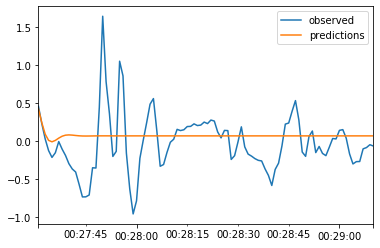

In [15]:
AR_df=pd.DataFrame({ 'observed': test, 'predictions': predictions})
AR_df.plot()

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

H 0: The data is not stationary

H 1: The data is stationar

In [16]:
adfuller(sensor['userAcceleration.x'])

(-17.95799408616976,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [17]:
adfuller(sensor['rotationRate.x'])[1]

6.3202303359124956e-06

What are your conclusions from this test?

### Your conclusions here:
p-value is less than 0.05; Outside of a 95% confidence interval, we do reject the null hypothesis.
conclusion that the data is stationary.
=> we can validate the model of autoregression

# ARMA(n, q) where n is the number of lag periods and q is the number of past white noise terms.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [18]:
train, test = sensor['userAcceleration.x'][:-10], sensor['userAcceleration.x'][-10:]
# Train and test sets definition 

In [19]:
#fit model
model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)

#make prediction
#predictions = model_fit.predict(len(sensor['userAcceleration.x'])-10, len(sensor['userAcceleration.x'])-1)


In [20]:
predARMA = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [21]:
predARMA

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [22]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = sqrt(mean_squared_error(sensor['userAcceleration.x'][-10:], predARMA))
# print(rmse)

In [23]:
result=pd.DataFrame({'observed':sensor['userAcceleration.x'][-10:], 'predicted':predARMA})
result

,observed,predicted
2018-01-01 00:29:01,0.149749,0.173149
2018-01-01 00:29:02,0.038461,0.142896
2018-01-01 00:29:03,-0.169175,0.100522
2018-01-01 00:29:04,-0.300361,0.070106
2018-01-01 00:29:05,-0.270174,0.056099
2018-01-01 00:29:06,-0.268367,0.053778
2018-01-01 00:29:07,-0.102444,0.056790
2018-01-01 00:29:08,-0.085590,0.060646
2018-01-01 00:29:09,-0.048105,0.063316
2018-01-01 00:29:10,-0.065011,0.064493


In [24]:
x1=sensor['userAcceleration.x'][-10:]
x2= predARMA

In [26]:
import statsmodels.tools.eval_measures
statsmodels.tools.eval_measures.rmse(x1,x2)

0.2252986363699454

In [ ]:
# value RMSE 0.2252986363699454  is high , shall be close to 0

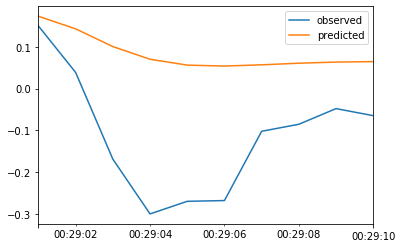

In [27]:
result.plot()